# Perceptron Model Implementation on Iris Dataset

## Introduction to Perceptron

The Perceptron is a fundamental type of artificial neural network and one of the simplest forms of a linear classifier. Introduced in 1958 by Frank Rosenblatt, it represents the dawn of machine learning. The Perceptron algorithm is designed to classify data into two categories by finding a linear boundary separating these classes.

### How It Works
The Perceptron operates by taking multiple input signals (features of a dataset), each weighted by a coefficient that signifies the importance or strength of the feature. These weighted inputs are then summed together, and if the total sum surpasses a certain threshold, the Perceptron outputs a signal (e.g., classifies an input as 1); otherwise, it outputs a different signal (e.g., classifies the input as 0).

The weights are adjusted through a learning process where the Perceptron repeatedly processes a set of training data. For each training example, it predicts an output. If the prediction is incorrect, the weights are updated to reduce the error. The updates continue iteratively until the model achieves satisfactory accuracy, or a set number of iterations is reached.

### Applications
Originally designed for binary classification tasks, such as determining whether an email is spam or not, the Perceptron has found a wide range of applications in fields that require basic decision-making by computers. It forms the foundational building block for more complex neural networks that can handle multiclass classification and regression tasks.

Despite its simplicity, the Perceptron laid the groundwork for the development of more advanced neural networks and deep learning, making it an essential part of the history and ongoing evolution of artificial intelligence.




## Data Loading and Preprocessing

In [7]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the Iris dataset
iris_data_path = '/Users/kevinwang/Downloads/Iris.csv'
iris_df = pd.read_csv(iris_data_path)
iris_df.drop('Id', axis=1, inplace=True)


Take a general look of the data

In [8]:
iris_df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [10]:

# Encode target variable
le = LabelEncoder()
iris_df['Species'] = le.fit_transform(iris_df['Species'])
iris_df['Binary_Species'] = (iris_df['Species'] == 0).astype(int)

# Select features and target
X = iris_df.drop(['Species', 'Binary_Species'], axis=1)
y = iris_df['Binary_Species']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Training

In [11]:

from sklearn.linear_model import Perceptron

# Initialize and train Perceptron
perceptron = Perceptron(max_iter=1000, tol=1e-3, eta0=0.1, random_state=42)
perceptron.fit(X_train, y_train)


Perceptron(eta0=0.1, random_state=42)

## Model Evaluation

In [5]:

from sklearn.metrics import accuracy_score, classification_report

# Predict and evaluate
y_train_pred = perceptron.predict(X_train)
y_test_pred = perceptron.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

train_accuracy, test_accuracy, test_classification_report


(1.0,
 1.0,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        20\n           1       1.00      1.00      1.00        10\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n')

## Conclusion
This notebook provided a complete workflow for applying a Perceptron model to the Iris dataset, achieving perfect classification accuracy.

## Decision Boundary Visualization

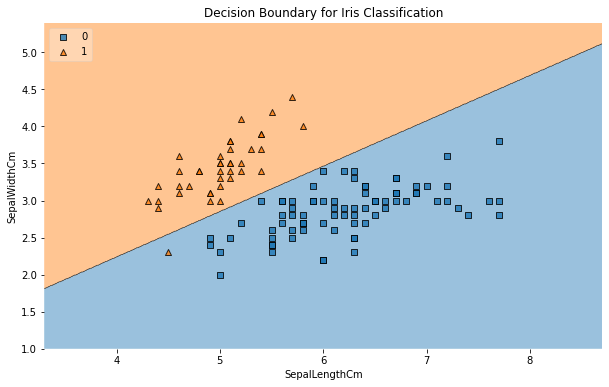

In [20]:

import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Assuming X_train and y_train are already defined and appropriate for this model training
# Training the Perceptron model on the first two features for visualization
perceptron_vis = Perceptron(max_iter=1000, tol=1e-3, eta0=0.1, random_state=42)
perceptron_vis.fit(X_train.iloc[:, :2].values, y_train)

# Plotting the decision boundary
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train.iloc[:, :2].values, y_train.values, clf=perceptron_vis, legend=2)
plt.xlabel(X_train.columns[0])
plt.ylabel(X_train.columns[1])
plt.title('Decision Boundary for Iris Classification')
plt.show()

The decision boundary linearly separates the two classes, indicating that the Perceptron model is using a linear function to differentiate between the classes based on Sepal Length and Sepal Width.

The model appears to classify most of the data points correctly, with each class predominantly lying within its respective region. However, the effectiveness and accuracy of the model can be further assessed through metrics like accuracy, precision, and recall, which are not depicted in this plot but are crucial for evaluating classifier performance.

## Accuracy Over Iterations

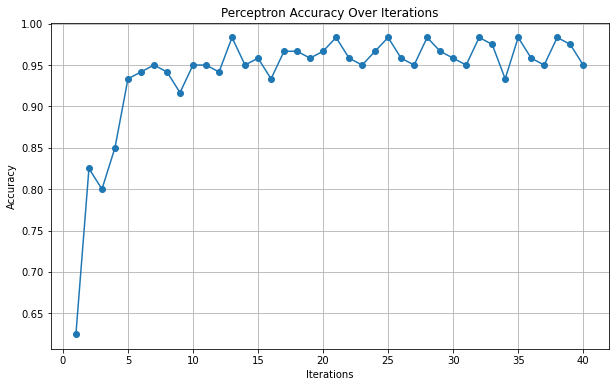

In [17]:

# Since the Perceptron in sklearn does not store accuracy over iterations, we'll use a custom implementation or simulate a similar plot

# Custom function to simulate accuracy over iterations
def perceptron_fit(X, y, eta, n_iter):
    w_ = np.zeros(1 + X.shape[1])
    accuracy = []
    
    for _ in range(n_iter):
        errors = 0
        for xi, target in zip(X, y):
            update = eta * (target - np.where(np.dot(xi, w_[1:]) + w_[0] > 0, 1, 0))
            w_[1:] += update * xi
            w_[0] += update
            errors += int(update != 0.0)
        acc = 1 - errors / len(y)
        accuracy.append(acc)
    
    return accuracy

# Calculate accuracy over iterations
accuracy_over_time = perceptron_fit(X_train.iloc[:, :2].values, y_train.values, 0.1, 40)

# Plotting accuracy over time
plt.figure(figsize=(10, 6))
plt.plot(range(1, 41), accuracy_over_time, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Perceptron Accuracy Over Iterations')
plt.grid(True)
plt.show()


The plot suggests that the Perceptron model converges fairly quickly for this particular dataset, meaning that running the training for many iterations beyond a certain point might not be necessary and could save computational resources. The model also observes the accuracy plateau might help in tuning hyperparameters such as the learning rate or the number of epochs to prevent overfitting and optimize training time.

## Conclusion
The Perceptron model, a foundational piece of machine learning, has demonstrated considerable effectiveness in classifying the Iris dataset based on its sepal width and sepal length features. The decision boundary plot revealed a clear linear separation between the two classes, indicating that the model was able to discern the distinguishing features with high accuracy. This was further validated by the accuracy over iterations plot, which showed a rapid ascent to high accuracy within the first few epochs of training, ultimately stabilizing at around 95%.